# [VIB0007] Sales Performance Analysis Visualization

## Task 1: Collect Data



Importing Required Libraries and Downloading the Dataset

In [1]:
#First import required libraries and uploaded the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#The dataset is downloaded from Kaggle and saved as 'newstoredata1.csv'

sales_data=pd.read_csv('newstoredata1.csv')
sales_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


# Task 2: Clean Data

### Checking and Handling Missing Values

In [2]:
# Info of the dataset columns
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
# Check the missing values
sales_data.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [4]:
# Drop the missing values in Postal_Code
sales_data = sales_data.dropna(subset=['Postal_Code'])

In [5]:
# Convert data types so data is accurate
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'], errors='coerce')
sales_data['Ship_Date'] = pd.to_datetime(sales_data['Ship_Date'], errors='coerce')
sales_data['Postal_Code'] = pd.to_numeric(sales_data['Postal_Code'], errors='coerce').astype('Int64')
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   object        
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   Int64         
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub_Category   9789 n

In [6]:
# Round the 'Sales' column to two decimal places
sales_data['Sales'] = sales_data['Sales'].round(2)
sales_data.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37


# # Task 3: Put Data Together

### Identifying and Handling Outliers

In [7]:
sales_data.describe(include='all')

C:\Users\diyav\AppData\Local\Temp/ipykernel_16552/1170996201.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_data.describe(include='all')


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
count,9789.000000,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789.000000,9789,9789,9789,9789,9789,9789.000000
unique,NaN,4916,1229,1326,4,793,793,3,1,529,48,NaN,4,1860,3,17,1848,NaN
top,NaN,CA-2018-100111,2017-05-09 00:00:00,2018-09-26 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5849,35,35,5096,9789,891,1946,NaN,3140,18,5903,1492,47,NaN
first,NaN,NaN,2015-01-02 00:00:00,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-12-30 00:00:00,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4896.705588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.116169
std,2827.486899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,625.302083
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.440000
25%,2449.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.250000


In [8]:

# Extract the 'Sales' column
sales_column = sales_data['Sales']

# Calculate quartiles and IQR
Q1 = sales_column.quantile(0.25)
Q3 = sales_column.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = sales_data[(sales_column < lower_bound) | (sales_column > upper_bound)]

# Print the potential outliers
print("Potential Outliers:")
print(outliers)

Potential Outliers:
      Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
1          2  CA-2017-152156 2017-08-11 2017-11-11    Second Class   
3          4  US-2016-108966 2016-11-10 2016-10-18  Standard Class   
7          8  CA-2015-115812 2015-09-06 2015-06-14  Standard Class   
10        11  CA-2015-115812 2015-09-06 2015-06-14  Standard Class   
11        12  CA-2015-115812 2015-09-06 2015-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9759    9760  CA-2017-146913 2017-10-31 2017-05-11  Standard Class   
9774    9775  CA-2015-169019 2015-07-26 2015-07-30  Standard Class   
9781    9782  CA-2017-153178 2017-09-14 2017-09-18  Standard Class   
9787    9788  CA-2018-144491 2018-03-27 2018-01-04  Standard Class   
9788    9789  CA-2018-144491 2018-03-27 2018-01-04  Standard Class   

     Customer_ID    Customer_Name    Segment        Country             City  \
1       CG-12520      Claire Gute   Consumer  United States

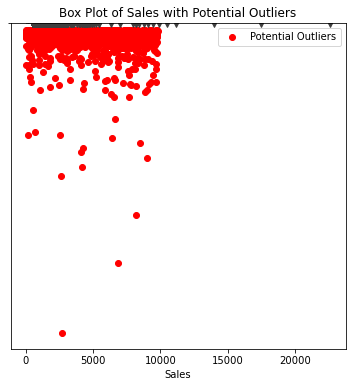

In [9]:

# Extract the 'Sales' column
sales_column = sales_data['Sales']

# Calculate quartiles and IQR
Q1 = sales_column.quantile(0.25)
Q3 = sales_column.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a box plot using seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x=sales_column)

# Highlight potential outliers
plt.scatter(x=outliers.index, y=outliers['Sales'], color='red', label='Potential Outliers')

# Set plot labels and title
plt.xlabel('Sales')
plt.title('Box Plot of Sales with Potential Outliers')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [10]:
# Assuming your data is stored in a DataFrame called 'df'
# Replace 'df' with the actual variable name if different

# Extract the 'Sales' column
sales_column = sales_data['Sales']

# Calculate quartiles and IQR
Q1 = sales_column.quantile(0.25)
Q3 = sales_column.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with potential outliers
df_no_outliers = sales_data[(sales_column >= lower_bound) & (sales_column <= upper_bound)]

# Now, df_no_outliers contains the DataFrame with outliers removed

In [11]:
# Save df_no_outliers as a new CSV file
df_no_outliers.to_csv('new_dataset_without_outliers.csv', index=False)


In [12]:
# Load the CSV file into a DataFrame
final_data = pd.read_csv('new_dataset_without_outliers.csv')
final_data

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
2,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
3,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86
4,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
8644,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
8645,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
8646,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


In [13]:
final_data.describe()

,Row_ID,Postal_Code,Sales
count,8648.00000,8648.000000,8648.000000
mean,4913.54371,55430.749075,93.183821
std,2829.51562,31960.123339,114.638670
min,1.00000,1040.000000,0.440000
25%,2453.75000,23320.000000,15.057500
50%,4921.50000,60035.000000,40.830000
75%,7357.25000,90004.000000,124.370000
max,9800.00000,99301.000000,499.990000


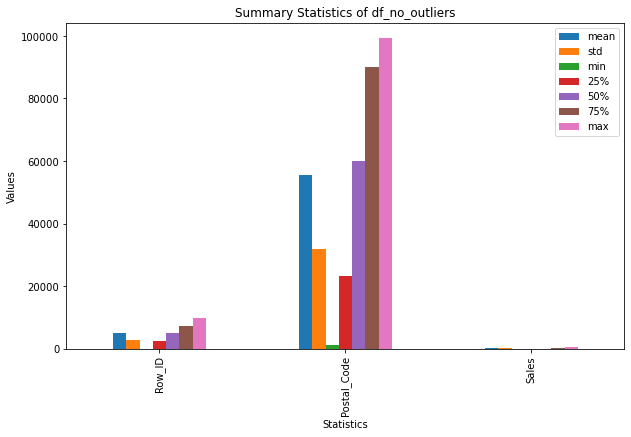

In [14]:
# Assuming your data is stored in a DataFrame called 'df_no_outliers'
# Replace 'df_no_outliers' with the actual variable name if different

# Get the summary statistics
summary_stats = final_data.describe()

# Transpose the DataFrame for easier plotting
summary_stats = summary_stats.transpose()

# Plot the summary statistics using a bar plot
summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Summary Statistics of df_no_outliers')

# Show the plot
plt.show()

This code uses the describe method to get the summary statistics and then transposes the DataFrame for better visualization. The bar plot is created using the plot method, and only selected statistics (mean, std, min, 25%, 50%, 75%, max) are plotted.

In [ ]:
Target 2